In [6]:
from pymongo import MongoClient
from pprint import pprint

In [7]:
client = MongoClient('localhost', 27017)

In [8]:
db = client.admin

In [9]:
server_status = db.command("serverStatus")
pprint(server_status)

{'asserts': {'msg': 0, 'regular': 0, 'rollovers': 0, 'user': 11, 'warning': 0},
 'connections': {'active': 1,
                 'available': 51195,
                 'current': 5,
                 'totalCreated': 77},
 'electionMetrics': {'averageCatchUpOps': 0.0,
                     'catchUpTakeover': {'called': 0, 'successful': 0},
                     'electionTimeout': {'called': 0, 'successful': 0},
                     'freezeTimeout': {'called': 0, 'successful': 0},
                     'numCatchUps': 0,
                     'numCatchUpsAlreadyCaughtUp': 0,
                     'numCatchUpsFailedWithError': 0,
                     'numCatchUpsFailedWithNewTerm': 0,
                     'numCatchUpsFailedWithReplSetAbortPrimaryCatchUpCmd': 0,
                     'numCatchUpsSkipped': 0,
                     'numCatchUpsSucceeded': 0,
                     'numCatchUpsTimedOut': 0,
                     'numStepDownsCausedByHigherTerm': 0,
                     'priorityTakeover': {'

In [11]:
import datetime
post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

In [12]:
post

{'author': 'Mike',
 'text': 'My first blog post!',
 'tags': ['mongodb', 'python', 'pymongo'],
 'date': datetime.datetime(2020, 2, 25, 10, 24, 28, 657983)}

In [13]:
posts = db.posts
post_id = posts.insert_one(post).inserted_id

In [15]:
post_id

ObjectId('5e54f608f530629f94c120e2')

In [16]:
db.list_collection_names()

['system.version', 'posts']

In [18]:
client.list_databases()

In [21]:
client.list_database_names()

['admin', 'config', 'local', 'my_database', 'sacred']

In [22]:
db = client["my_database"]

In [23]:
db.list_collection_names()

['fs.files', 'omniboard.settings', 'fs.chunks', 'metrics', 'runs']

In [26]:
runs = db.runs

In [28]:
run10 = runs.find_one()

In [32]:
run10.keys()

dict_keys(['_id', 'experiment', 'format', 'command', 'host', 'start_time', 'config', 'meta', 'status', 'resources', 'artifacts', 'captured_out', 'info', 'heartbeat', 'result', 'stop_time'])

In [42]:
for key in run10:
    print(key, run10[key])

_id 10
experiment {'name': 'policy_gradients', 'base_dir': '/home/koen/Programming/VKHO', 'sources': [['game/__init__.py', ObjectId('5dd3e379c90b611574950346')], ['game/envs.py', ObjectId('5dd3e379c90b611574950348')], ['marl/__init__.py', ObjectId('5dd3e379c90b61157495034a')], ['marl/agent_models.py', ObjectId('5dd3e379c90b61157495034b')], ['marl/pg.py', ObjectId('5dd3e379c90b61157495034d')], ['test_pg.py', ObjectId('5dd3e38ce0547701c1cdee17')]], 'dependencies': ['numpy==1.17.4', 'sacred==0.8.0', 'torch==1.1.0'], 'repositories': [{'url': 'https://github.com/koenboeckx/VKHO.git', 'commit': '7f7ae9a53fb368f7cc9dacff8e5acf8152f6fdf7', 'dirty': True}, {'url': 'https://github.com/koenboeckx/VKHO.git', 'commit': '7f7ae9a53fb368f7cc9dacff8e5acf8152f6fdf7', 'dirty': True}, {'url': 'https://github.com/koenboeckx/VKHO.git', 'commit': '7f7ae9a53fb368f7cc9dacff8e5acf8152f6fdf7', 'dirty': True}, {'url': 'https://github.com/koenboeckx/VKHO.git', 'commit': '7f7ae9a53fb368f7cc9dacff8e5acf8152f6fdf7', 

In [43]:
metrics = db.metrics

In [64]:
result = metrics.find_one({'run_id': 681, 'name' : 'length'})

In [65]:
from matplotlib import pyplot as plt

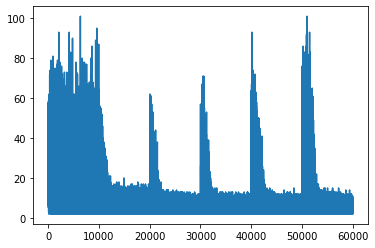

In [66]:
x = result['steps']
y = result['values']
plt.plot(x, y)